# Titanic Project

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [1]:
import pandas as pd
Titanic=pd.read_csv("titanic_train.csv",sep=",") #reading titanic_train.csv file
Titanic.head() #Looking into top 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
Titanic.shape #Checking the shape of our data

(891, 12)

In [3]:
Titanic.dtypes #Checking the datatype of each attribute

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
Titanic['Survived'].unique()

array([0, 1], dtype=int64)

Target variable i.e. Survived is int64 but it's either 0 or 1 so we'll use Classification to learn our model.

# EDA

## Univariate Analysis

### Numerial Visualization

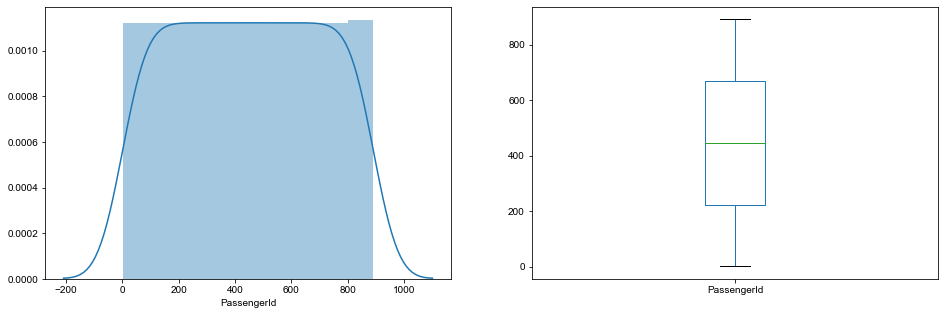

<Figure size 1440x504 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplot(121)
sns.distplot(Titanic['PassengerId'])
plt.subplot(122)
Titanic['PassengerId'].plot.box(figsize=(16,5))
sns.set_style("whitegrid")
plt.figure(figsize = (20,7))
plt.show()

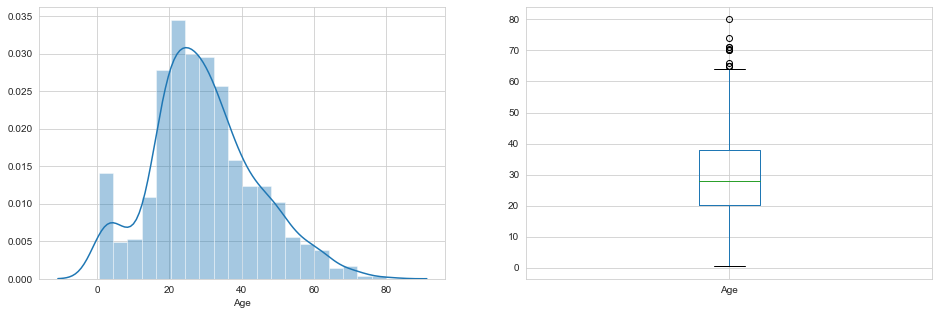

<Figure size 1440x504 with 0 Axes>

In [6]:
plt.subplot(121)
sns.distplot(Titanic['Age'])
plt.subplot(122)
Titanic['Age'].plot.box(figsize=(16,5))
sns.set_style("whitegrid")
plt.figure(figsize = (20,7))
plt.show()

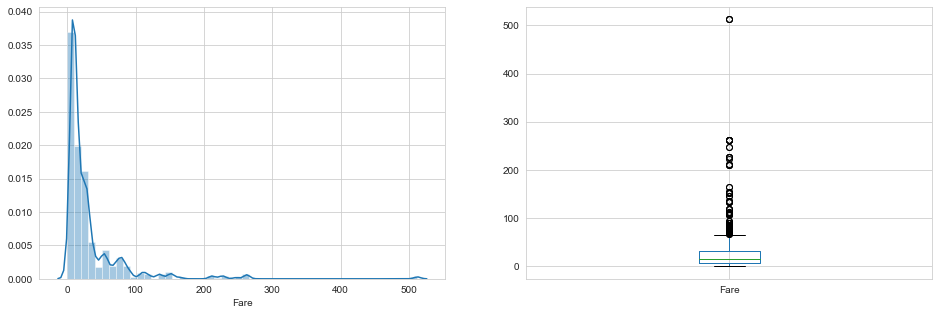

<Figure size 1440x504 with 0 Axes>

In [7]:
plt.subplot(121)
sns.distplot(Titanic['Fare'])
plt.subplot(122)
Titanic['Fare'].plot.box(figsize=(16,5))
sns.set_style("whitegrid")
plt.figure(figsize = (20,7))
plt.show()

### Categorical Visualization

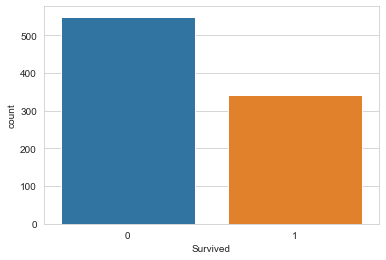

In [8]:
import seaborn as sns
ax = sns.countplot(x="Survived", data=Titanic)

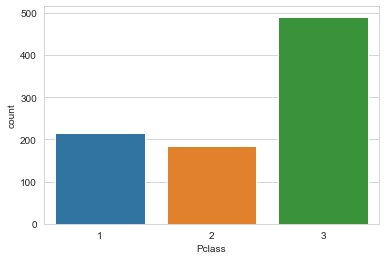

In [9]:
import seaborn as sns
ax = sns.countplot(x="Pclass", data=Titanic)

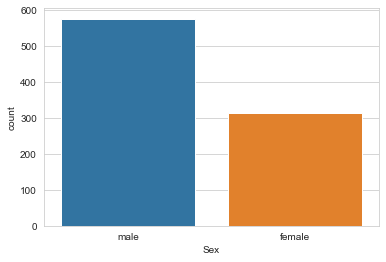

In [10]:
import seaborn as sns
ax = sns.countplot(x="Sex", data=Titanic)

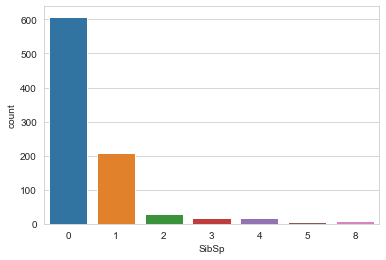

In [11]:
import seaborn as sns
ax = sns.countplot(x="SibSp", data=Titanic)

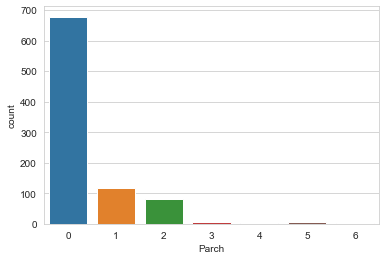

In [12]:
import seaborn as sns
ax = sns.countplot(x="Parch", data=Titanic)

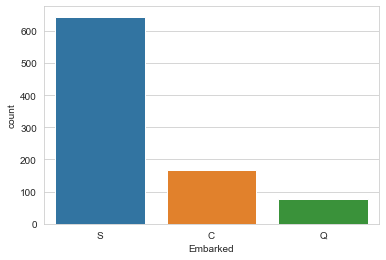

In [13]:
import seaborn as sns
ax = sns.countplot(x="Embarked", data=Titanic)

## Bi-variate Analysis

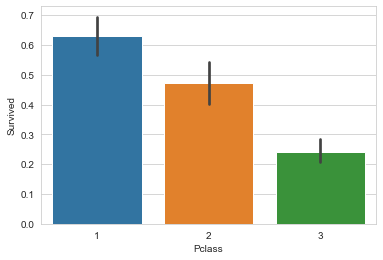

In [14]:
sns.barplot(x = 'Pclass', y = 'Survived', data = Titanic)

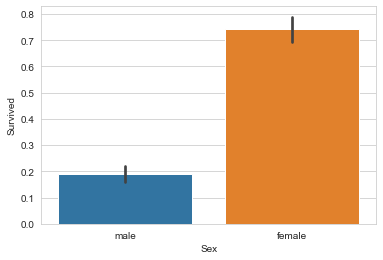

In [15]:
sns.barplot(x = 'Sex', y = 'Survived', data = Titanic)

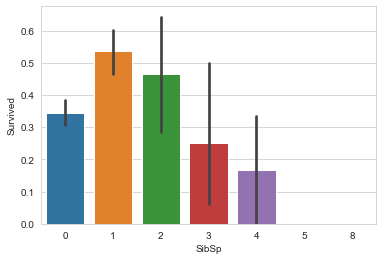

In [16]:
sns.barplot(x = 'SibSp', y = 'Survived', data = Titanic)

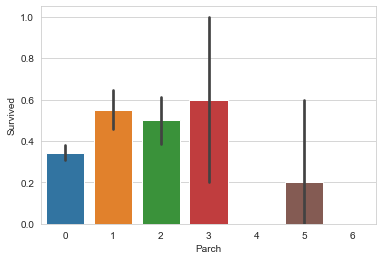

In [17]:
sns.barplot(x = 'Parch', y = 'Survived', data = Titanic)

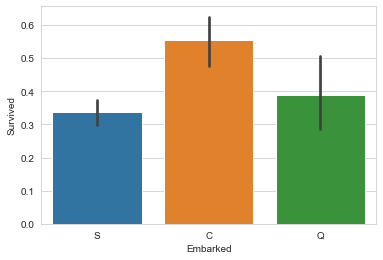

In [18]:
sns.barplot(x = 'Embarked', y = 'Survived', data = Titanic)

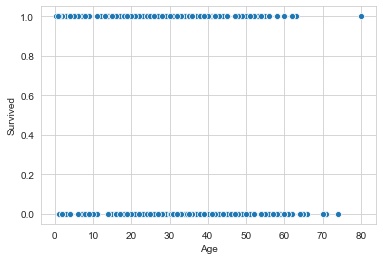

In [19]:
sns.scatterplot(x = 'Age', y = 'Survived', data = Titanic)

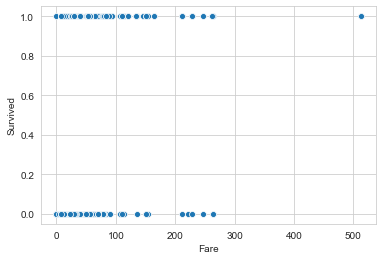

In [20]:
sns.scatterplot(x = 'Fare', y = 'Survived', data = Titanic)

## Multi-Variate Analysis

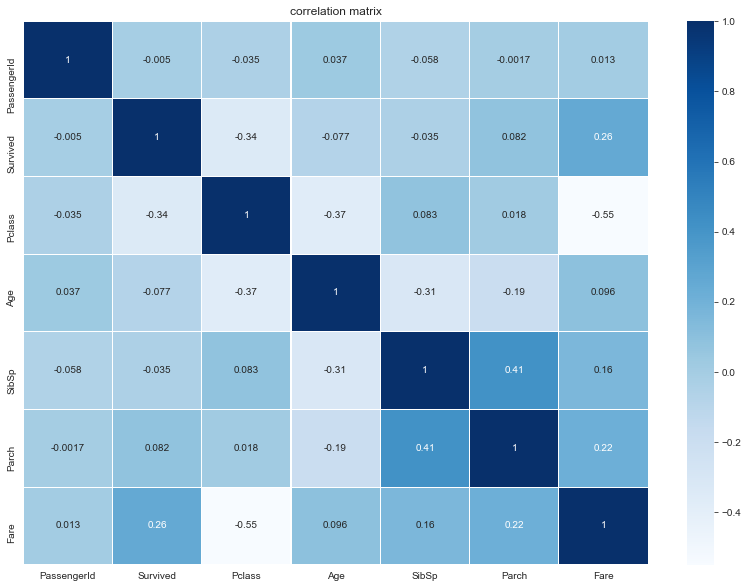

In [21]:
fig=plt.figure(figsize=(14,10))
hc=Titanic.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues",linewidths=.1, annot_kws={"size": 10})
plt.title("correlation matrix")
plt.show()

Pclass and Fare is corelated with Surivied not that good but they are corelated

# DATA CLEANING

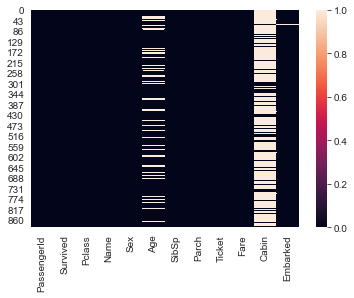

In [22]:
sns.heatmap(Titanic.isnull()) #Looking for null values if any, in heatmap

Age and Cabin have lots of missing values

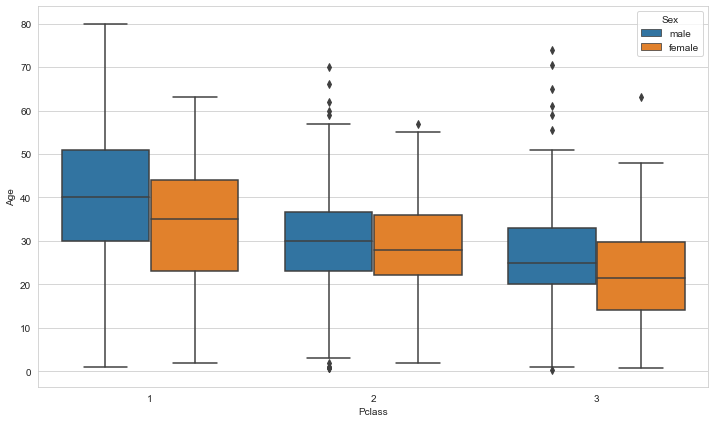

In [23]:
# Plot the responses for different Age and Pclass
sns.set_style("whitegrid")
plt.figure(figsize = (12,7))
sns.boxplot(x="Pclass", y="Age",hue="Sex",data=Titanic)

In [24]:
#import numpy as np
#if Titanic['Age'].isnull :
#    if np.where(((Titanic['Age'].isnull()) & (Titanic.Pclass == 1) & (Titanic.Sex == 'male'))):
#        Titanic['Age'] = 40
#    elif np.where(((Titanic['Age'].isnull()) & (Titanic.Pclass == 1) & (Titanic.Sex == 'female'))):
#        Titanic['Age'] = 35
#    elif np.where(((Titanic['Age'].isnull()) & (Titanic.Pclass == 2) & (Titanic.Sex == 'male'))):
#        Titanic['Age'] = 30
#    elif np.where(((Titanic['Age'].isnull()) & (Titanic.Pclass == 2) & (Titanic.Sex == 'female'))):
#        Titanic['Age'] = 28
#    elif np.where(((Titanic['Age'].isnull()) & (Titanic.Pclass == 3) & (Titanic.Sex == 'male'))):
#        Titanic['Age'] = 25
#    elif np.where(((Titanic['Age'].isnull()) & (Titanic.Pclass == 3) & (Titanic.Sex == 'female'))):
#        Titanic['Age'] = 22

In [25]:
import numpy as np
Titanic['Age'] = np.where(((Titanic['Age'].isnull()) & (Titanic.Pclass == 1) & (Titanic.Sex == 'male')),40,Titanic.Age)
Titanic['Age'] = np.where(((Titanic['Age'].isnull()) & (Titanic.Pclass == 1) & (Titanic.Sex == 'female')),35,Titanic.Age)
Titanic['Age'] = np.where(((Titanic['Age'].isnull()) & (Titanic.Pclass == 2) & (Titanic.Sex == 'male')),30,Titanic.Age)
Titanic['Age'] = np.where(((Titanic['Age'].isnull()) & (Titanic.Pclass == 2) & (Titanic.Sex == 'female')),28,Titanic.Age)
Titanic['Age'] = np.where(((Titanic['Age'].isnull()) & (Titanic.Pclass == 3) & (Titanic.Sex == 'male')),25,Titanic.Age)
Titanic['Age'] = np.where(((Titanic['Age'].isnull()) & (Titanic.Pclass == 3) & (Titanic.Sex == 'female')),22,Titanic.Age)

In [26]:
Titanic['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [27]:
#Dropping Cabin Column
Titanic.drop("Cabin", axis = 1, inplace = True)

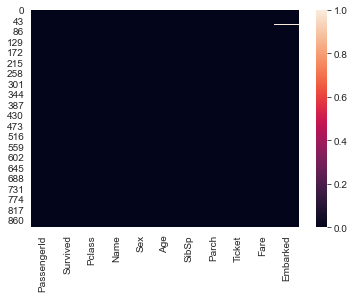

In [28]:
sns.heatmap(Titanic.isnull()) #Looking for null values if any, in heatmap

In [29]:
#Replacing missing Emarked with S because S is in majority
Titanic["Embarked"].fillna("S", inplace = True)

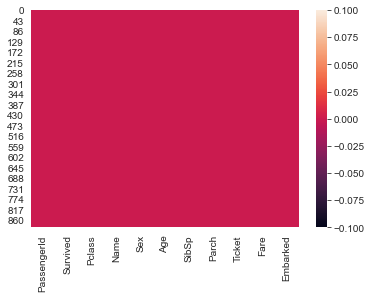

In [30]:
sns.heatmap(Titanic.isnull()) #Looking for null values if any, in heatmap

In [31]:
#Dropping Name Ticket and PassengerId becuase that not gone help us in prediction
Titanic.drop(["Name", "Ticket", "PassengerId"], axis = 1, inplace = True)

In [32]:
Titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Label Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
#Label Encoding for Sex because it's object type and we can't process it.
le = preprocessing.LabelEncoder()
Titanic['Sex'] = le.fit_transform(Titanic['Sex'])
Titanic['Embarked'] = le.fit_transform(Titanic['Embarked'])

In [34]:
Titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# Removing Outliers and Skewness

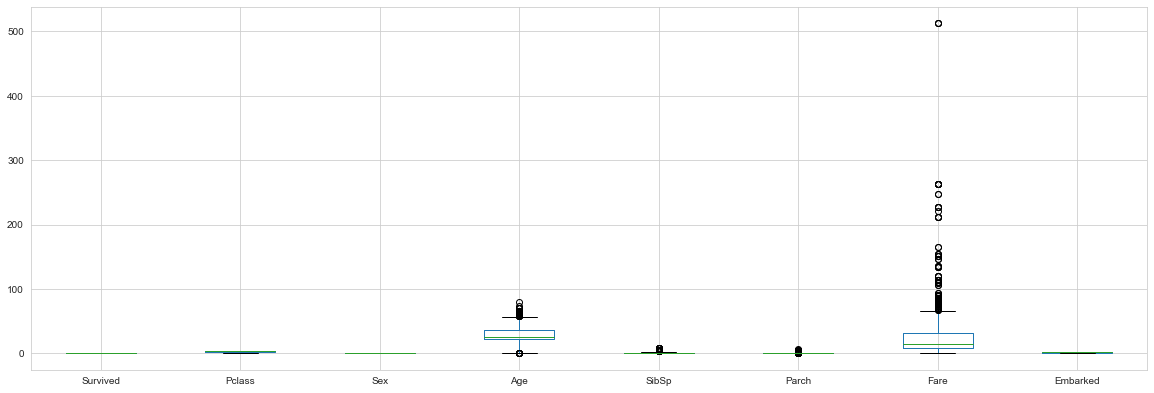

In [35]:
#Checking the outliers again
Titanic.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [36]:
import scipy
from scipy.stats import zscore
z=np.abs(zscore(Titanic))
threshold=3
new_Titanic=Titanic[(z<3).all(axis=1)]
new_Titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,22.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [37]:
print(Titanic.shape)
print(new_Titanic.shape)

(891, 8)
(820, 8)


In [38]:
#checking for how much data we lost
loss_percent=(891-820)/891*100
print(loss_percent)

7.968574635241302


We lost almost 8% of data, Which is not good.

In [39]:
Titanic.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.531969
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

Fare have high Skewness, we have to to remove it.

In [40]:
import warnings
warnings.filterwarnings('ignore')
#Titanic['Fare'] = np.sqrt(Titanic['Fare'])
Titanic['Fare'] = np.cbrt(Titanic['Fare'])

In [41]:
Titanic.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.531969
SibSp       3.695352
Parch       2.749117
Fare        1.230382
Embarked   -1.264823
dtype: float64

# Seperating Input and Output Variables

In [42]:
#Moved Survived i.e. target variable at last
x=Titanic.pop('Survived')
Titanic['Survived']=x
Titanic

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,1.935438,2,0
1,1,0,38.0,1,0,4.146318,0,1
2,3,0,26.0,0,0,1.993730,2,1
3,1,0,35.0,1,0,3.758647,2,1
4,3,1,35.0,0,0,2.004158,2,0
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,2.351335,2,0
887,1,0,19.0,0,0,3.107233,2,1
888,3,0,22.0,1,2,2.862294,2,0
889,1,1,26.0,0,0,3.107233,0,1


In [43]:
x=Titanic.iloc[:,:-1]
y=Titanic.iloc[:,-1:]

In [44]:
x.shape

(891, 7)

In [45]:
y.shape

(891, 1)

In [46]:
import numpy as np
y=np.ravel(y)

In [47]:
y.shape

(891,)

# Finding Best Random State

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,auc
import warnings
warnings.filterwarnings('ignore')
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu," on Random_state ",maxRS)

Best accuracy is 0.8544776119402985  on Random_state  11


# Train Test Split

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Finding Best Algorithm

In [50]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [51]:
model=[LogisticRegression(),KNeighborsClassifier(),BernoulliNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("*******************************************************************************")
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print('accuracy score of ->', m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())
    print("Difference between Accuracy score and cross validatio score is - ",accuracy_score(y_test,pred)-score.mean())
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print("*******************************************************************************")

*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> LogisticRegression()
0.8544776119402985
[[161  15]
 [ 24  68]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       176
           1       0.82      0.74      0.78        92

    accuracy                           0.85       268
   macro avg       0.84      0.83      0.83       268
weighted avg       0.85      0.85      0.85       268

[0.77653631 0.80898876 0.79213483 0.78089888 0.81460674]
0.7946331052664617
Difference between Accuracy score and cross validatio score is -  0.059844506673836784
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
*******************************************************************************
*******************************************************************************
||||||||||||||||||||||||||

Random Forest Classifier have highest Accuracy and Cross Validation Score is also good i.e. 80%

# Hyper Parameter Tuning

In [52]:
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

parameters = {"max_depth":[3,4,5,6,7,10,15,20],
              "max_features": [3,5,7,9],
              "min_samples_leaf":[2,3,4,5,6]}

clf = RandomizedSearchCV(RandomForestClassifier(), parameters)
clf.fit(x_train,y_train)
clf.best_params_  #Best parameters

{'min_samples_leaf': 2, 'max_features': 3, 'max_depth': 6}

In [53]:
clf.best_params_

{'min_samples_leaf': 2, 'max_features': 3, 'max_depth': 6}

In [54]:
clf_pred=clf.best_estimator_.predict(x_test)

In [55]:
accuracy_score(y_test,clf_pred)

0.8432835820895522

In [56]:
print(accuracy_score(y_test,clf_pred))
print(confusion_matrix(y_test,clf_pred))
print(classification_report(y_test,clf_pred))

0.8432835820895522
[[163  13]
 [ 29  63]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       176
           1       0.83      0.68      0.75        92

    accuracy                           0.84       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.84      0.84      0.84       268



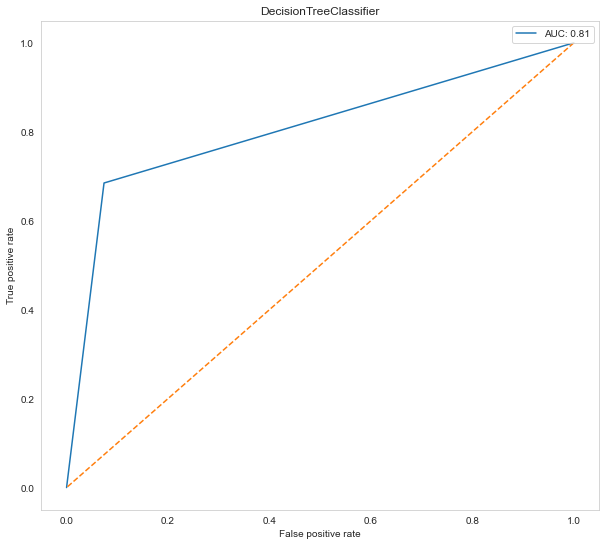

In [57]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
fpr,tpr,thresholds=roc_curve(y_test,clf_pred) # calculating fpr, tpr
rf_auc = auc(fpr, tpr) #Model Accuracy
plt.figure(figsize=(10,9)) #plotting the figure, size of 10*9
plt.plot(fpr, tpr, label = 'AUC: %0.2f' % rf_auc)
plt.plot([1,0],[1,0], linestyle = '--')
plt.legend(loc=0) #adding accuracy score at bottom right
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.grid() #adding the grid

# Saving the model

In [58]:
import joblib
joblib.dump(clf.best_estimator_,"PJ5_Titanic.obj")
SVR_from_joblib=joblib.load("PJ5_Titanic.obj")
Predicted = SVR_from_joblib.predict(x_test)
Predicted

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0], dtype=int64)

In [59]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([SVR_from_joblib.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267
Predicted,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,1,1,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0
Original,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,0,0,1,0,0,1,0,1,1,1,1,1,0,1,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,1,0,1,1,0,0,1,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,1,0,1,0


Our model learnt 84% which is good.